# Processing Data for Machine Learning Prediction

In [1]:
# Dependencies 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## Data Cleaning and Preparation

In [2]:
# Read the data from AWS/Google Cloud
full_data = pd.read_csv('data/final_crime.csv')
data_14 = pd.read_csv('data/2014_crime.csv')
data_15 = pd.read_csv('data/2015_crime.csv')
data_16 = pd.read_csv('data/2016_crime.csv')
data_17 = pd.read_csv('data/2017_crime.csv')
data_18 = pd.read_csv('data/2018_crime.csv')
data_19 = pd.read_csv('data/2019_crime.csv')
data_20 = pd.read_csv('data/2020_crime.csv')

C:\Users\smm11\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Count and store number of reports per year based on rows in CSV files
index14=data_14["Report_No"]
amount14=len(index14)

index15=data_15["Report_No"]
amount15=len(index15)

index16=data_16["Report_No"]
amount16=len(index16)

index17=data_17["Report_No"]
amount17=len(index17)

index18=data_18["Report_No"]
amount18=len(index18)

index19=data_19["Report_No"]
amount19=len(index19)

# Add 25% to 2020 in order to accomodate for the remaining three months of the year
index20=data_20["Report_No"]
amount2=len(index20)
amount20=amount2*1.25

# Store all amounts in a single list
yearly_crime_df = pd.DataFrame({'year': [2014,2015,2016,2017,2018,2019,2020], 
                                'crime_total': [amount14, amount15, amount16, amount17, amount18, amount19, amount20]})

yearly_crime_df.head(7)

,year,crime_total
0,2014,124832.0
1,2015,121901.0
2,2016,127877.0
3,2017,132139.0
4,2018,128938.0
5,2019,78046.0
6,2020,89597.5


In [4]:
# Assign X and Y
X = yearly_crime_df['year'].values.reshape(-1, 1)
y = yearly_crime_df['crime_total'].values.reshape(-1, 1)
print(X.shape, y.shape)

(7, 1) (7, 1)


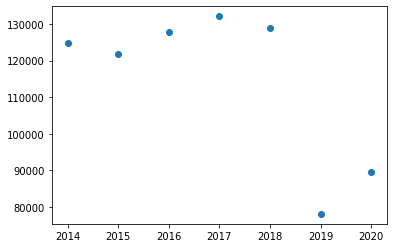

In [5]:
plt.scatter(X, y)

## Total Crime Linear Regression


In [ ]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [9]:
# Create a LinearRegression model and fit it to the scaled training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Print the coefficient and the intercept for the model
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-5751.48837209]]
y-axis intercept:  [11715622.65116279]


In [11]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)

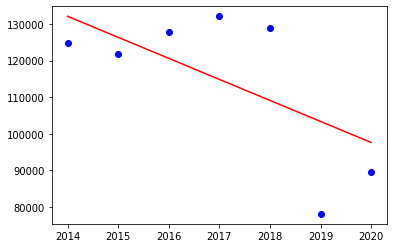

In [12]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [14]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 58466127.615802765, R2: 0.8404003963152358


# Total Homicide Linear Regression

In [ ]:
plt.scatter(CX, cy, c='blue')
plt.scatter(HX, hy, c='red')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')